In [2]:
import pandas as pd


purchase_df = pd.read_csv('../data/QVI_purchase_behaviour.csv')
transaction_df = pd.read_excel('../data/QVI_transaction_data.xlsx', sheet_name='in')

In [ ]:
# Converting 'DATE' column from Excel serial to datetime
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')

# Basic checks
print("Date Range:", transaction_df['DATE'].min(), "to", transaction_df['DATE'].max())
print("Missing Values:\n", transaction_df.isnull().sum())


Date Range: 2018-07-01 00:00:00 to 2019-06-30 00:00:00
Missing Values:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [4]:
import numpy as np

# Extracting Pack Size 
transaction_df['PACK_SIZE'] = transaction_df['PROD_NAME'].str.extract(r'(\d+)g').astype(float)

# Extracting Brand 
transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.split().str[0]

# Quick summary
print(transaction_df[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head())

# Check 
print("Missing PACK_SIZE values:", transaction_df['PACK_SIZE'].isna().sum())


                                  PROD_NAME  PACK_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g      175.0  Natural
1                  CCs Nacho Cheese    175g      175.0      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g      170.0   Smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g      175.0   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g      150.0   Kettle
Missing PACK_SIZE values: 6064


In [5]:
# Show rows with missing PACK_SIZE
missing_pack = transaction_df[transaction_df['PACK_SIZE'].isna()]
print(missing_pack[['PROD_NAME']].head(10))


                                    PROD_NAME
9       Grain Waves Sour    Cream&Chives 210G
34    Red Rock Deli Sp    Salt & Truffle 150G
35   Smiths Thinly       Swt Chli&S/Cream175G
212   Red Rock Deli Sp    Salt & Truffle 150G
292     Grain Waves Sour    Cream&Chives 210G
331   Red Rock Deli Sp    Salt & Truffle 150G
421  Smiths Thinly       Swt Chli&S/Cream175G
423     Grain Waves Sour    Cream&Chives 210G
428  Smiths Thinly       Swt Chli&S/Cream175G
465   Red Rock Deli Sp    Salt & Truffle 150G


In [6]:
# Update PACK_SIZE extraction to include both 'g' and 'G'
transaction_df['PACK_SIZE'] = transaction_df['PROD_NAME'].str.extract(r'(\d+)[gG]').astype(float)

# Re-check missing values
print("Missing PACK_SIZE values after fix:", transaction_df['PACK_SIZE'].isna().sum())


Missing PACK_SIZE values after fix: 0


In [7]:

duplicates = transaction_df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


print(transaction_df['PROD_QTY'].describe())

# View extreme values
print(transaction_df[transaction_df['PROD_QTY'] > 5].sort_values(by='PROD_QTY', ascending=False).head(10))


Duplicate rows: 1
count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0      380.0   
69763  Dorito Corn Chp     Supreme 380g       200      650.0      380.0   

        BRAND  
69762  Dorito  
69763  Dorito  


In [8]:
# Drop duplicate row
transaction_df.drop_duplicates(inplace=True)

# Filter out unrealistic bulk buys (e.g., anything over 5 units of chips)
transaction_df = transaction_df[transaction_df['PROD_QTY'] <= 5]

# Confirm cleanup
print("Remaining rows after cleaning:", len(transaction_df))


Remaining rows after cleaning: 264833


In [10]:
customer_df = pd.read_csv('../data/QVI_purchase_behaviour.csv')


In [12]:
import pandas as pd


customer_df = pd.read_csv('../data/QVI_purchase_behaviour.csv')

# Preview the data
print("Customer Data Preview:")
print(customer_df.head())

# Check for missing values
print("\nMissing values in customer data:")
print(customer_df.isnull().sum())


Customer Data Preview:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

Missing values in customer data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [13]:

merged_df = pd.merge(transaction_df, customer_df, on='LYLTY_CARD_NBR', how='inner')

# Quick check
print("Merged Data Preview:")
print(merged_df.head())

# Shape and null check
print("\nShape of merged data:", merged_df.shape)
print("Missing values after merge:")
print(merged_df.isnull().sum())


Merged Data Preview:
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural   YOUNG SINGLES/COUPLES          Premium  
1      CCs  MIDAGE SINGLES/CO

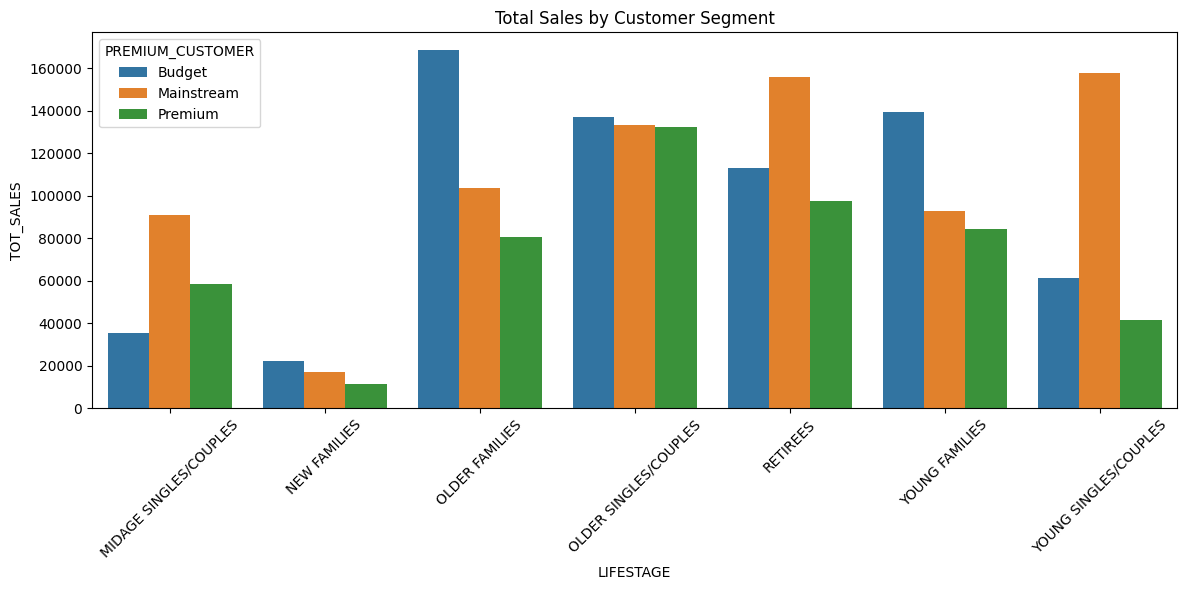

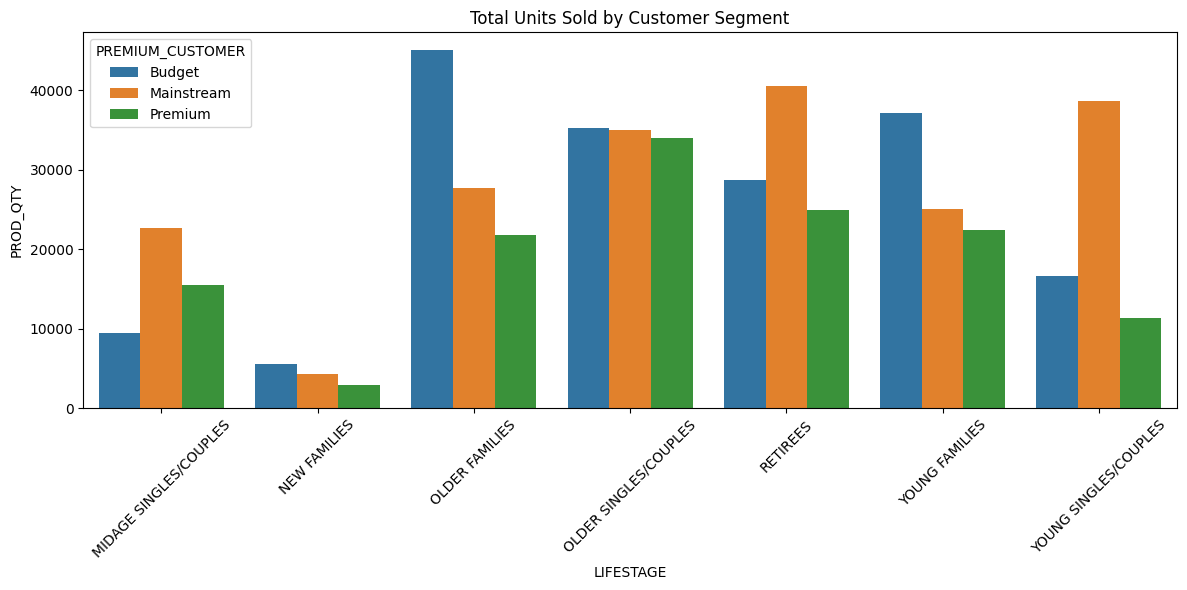

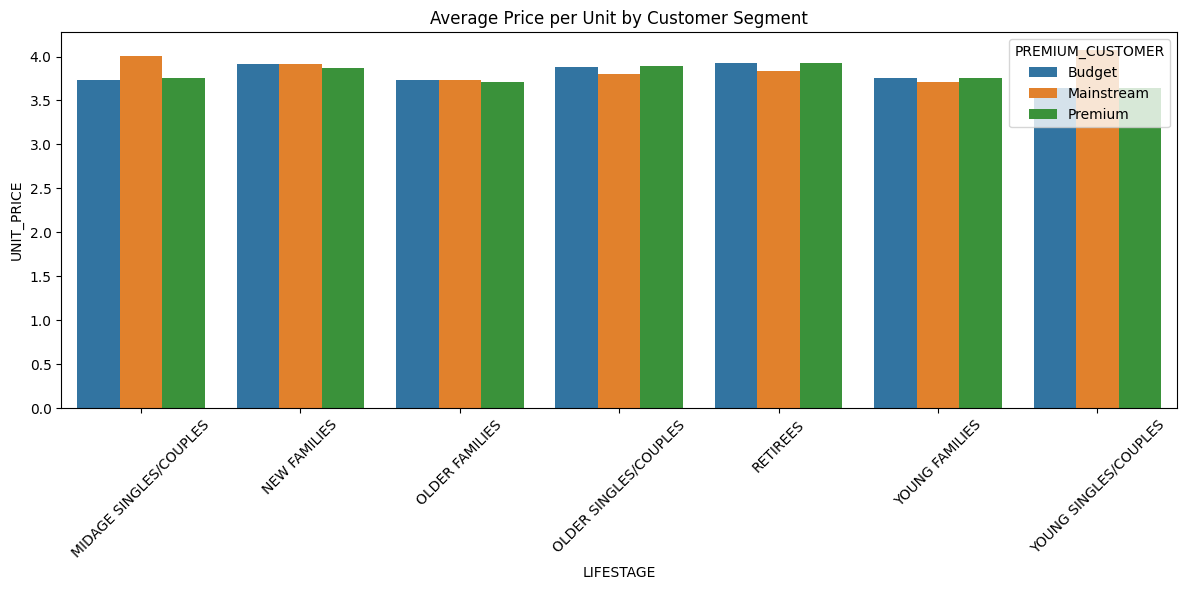

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Units sold by segment
units_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=units_by_segment, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.title('Total Units Sold by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average price per unit by segment
merged_df['UNIT_PRICE'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']
avg_price_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_by_segment, x='LIFESTAGE', y='UNIT_PRICE', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264833 entries, 0 to 264832
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   PACK_SIZE         264833 non-null  float64       
 9   BRAND             264833 non-null  object        
 10  LIFESTAGE         264833 non-null  object        
 11  PREMIUM_CUSTOMER  264833 non-null  object        
 12  UNIT_PRICE        264833 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memor

In [17]:
merged_df.describe()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,UNIT_PRICE
count,264833,264833.000000,2.648330e+05,2.648330e+05,264833.000000,264833.000000,264833.000000,264833.000000,264833.000000
mean,2018-12-30 00:52:39.666657792,135.079529,1.355489e+05,1.351577e+05,56.583598,1.905812,7.299351,182.425540,3.824632
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760000e+04,28.000000,2.000000,5.400000,150.000000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351370e+05,56.000000,2.000000,7.400000,170.000000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.027000e+05,85.000000,2.000000,9.200000,175.000000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000,6.500000
std,NaN,76.784189,8.058003e+04,7.813305e+04,32.826498,0.343437,2.527244,64.325268,1.109527


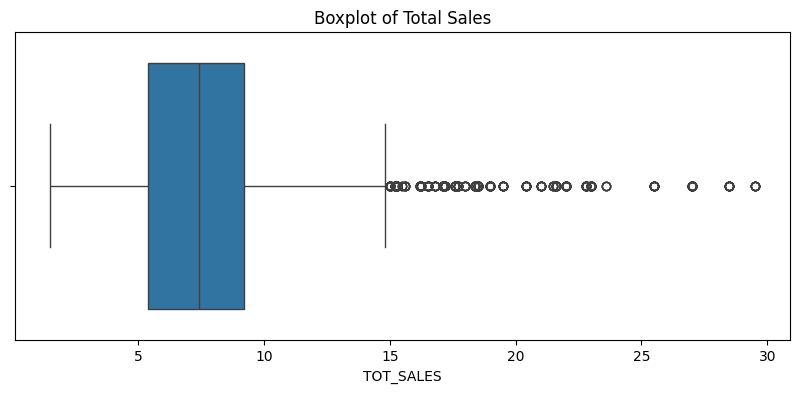

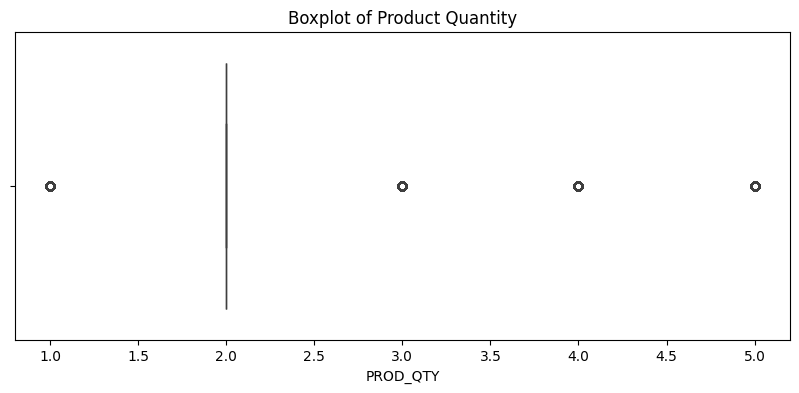

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=merged_df['TOT_SALES'])
plt.title('Boxplot of Total Sales')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=merged_df['PROD_QTY'])
plt.title('Boxplot of Product Quantity')
plt.show()

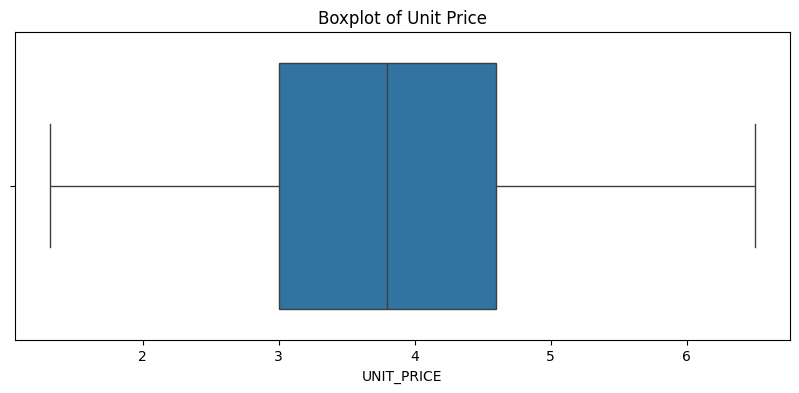

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=merged_df['UNIT_PRICE'])
plt.title('Boxplot of Unit Price')
plt.show()

In [21]:
# Check high quantity purchases
merged_df['PROD_QTY'].value_counts().sort_index(ascending=False).head(10)


PROD_QTY
5       450
4       397
3       430
2    236038
1     27518
Name: count, dtype: int64

C:\Users\Arnav\AppData\Local\Temp\ipykernel_5852\3628436135.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df,


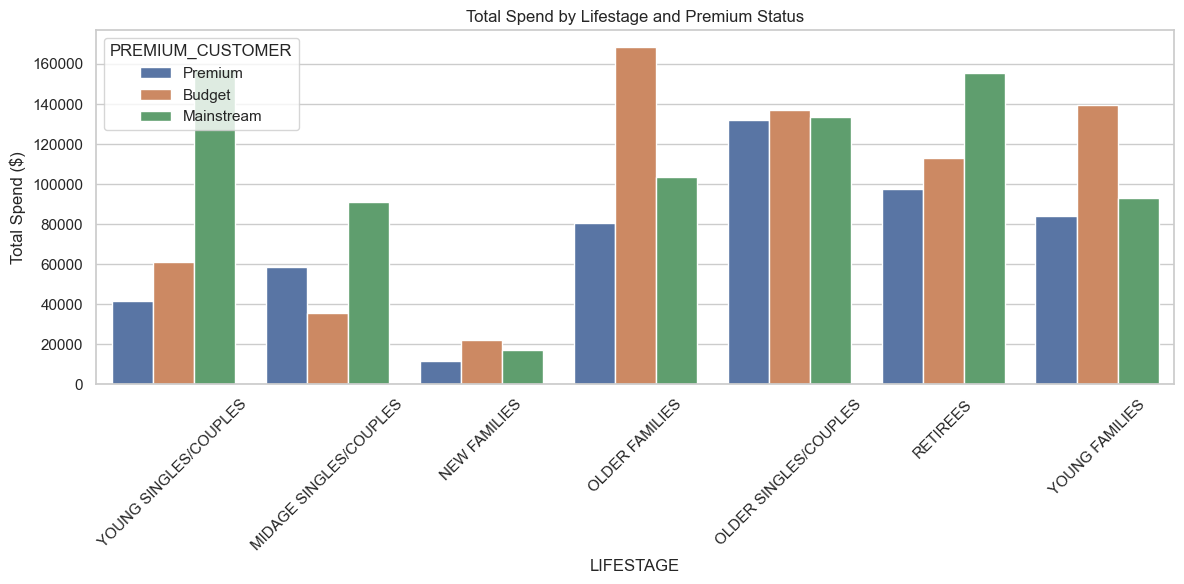

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Grouped spend by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, 
            x='LIFESTAGE', 
            y='TOT_SALES', 
            hue='PREMIUM_CUSTOMER', 
            estimator=sum,
            ci=None)
plt.title('Total Spend by Lifestage and Premium Status')
plt.xticks(rotation=45)
plt.ylabel('Total Spend ($)')
plt.tight_layout()
plt.show()


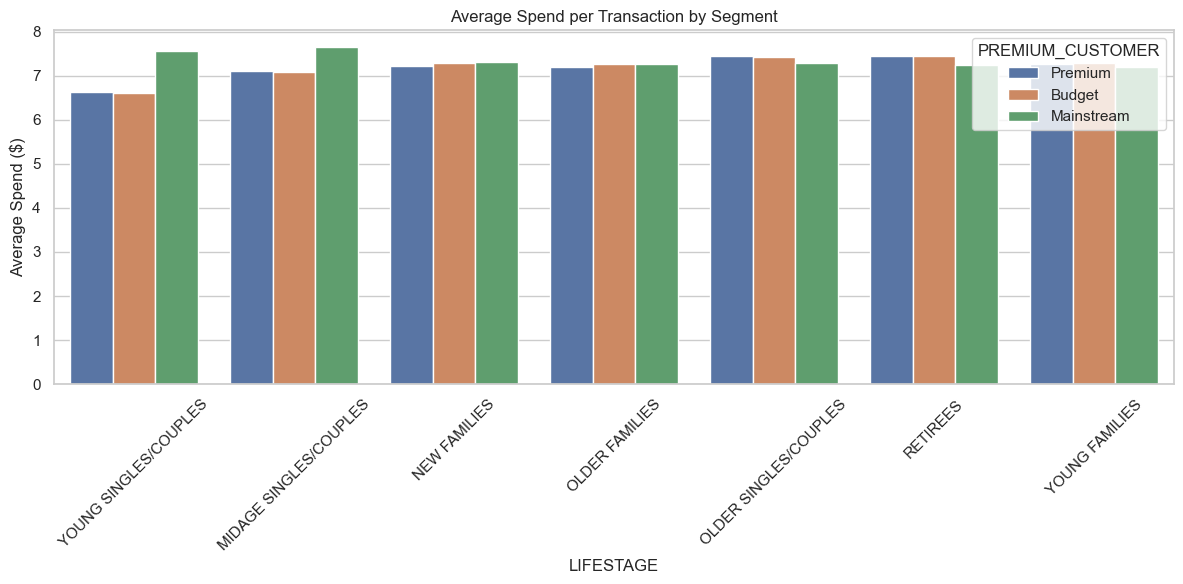

In [23]:
# Average spend by segment
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, 
            x='LIFESTAGE', 
            y='TOT_SALES', 
            hue='PREMIUM_CUSTOMER', 
            estimator='mean',
            errorbar=None)
plt.title('Average Spend per Transaction by Segment')
plt.xticks(rotation=45)
plt.ylabel('Average Spend ($)')
plt.tight_layout()
plt.show()


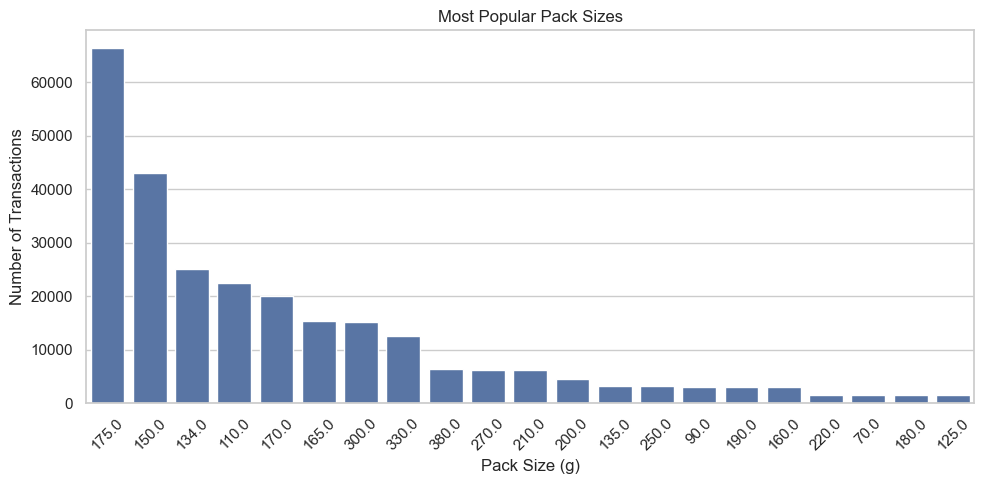

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x='PACK_SIZE', order=merged_df['PACK_SIZE'].value_counts().index)
plt.title('Most Popular Pack Sizes')
plt.xticks(rotation=45)
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


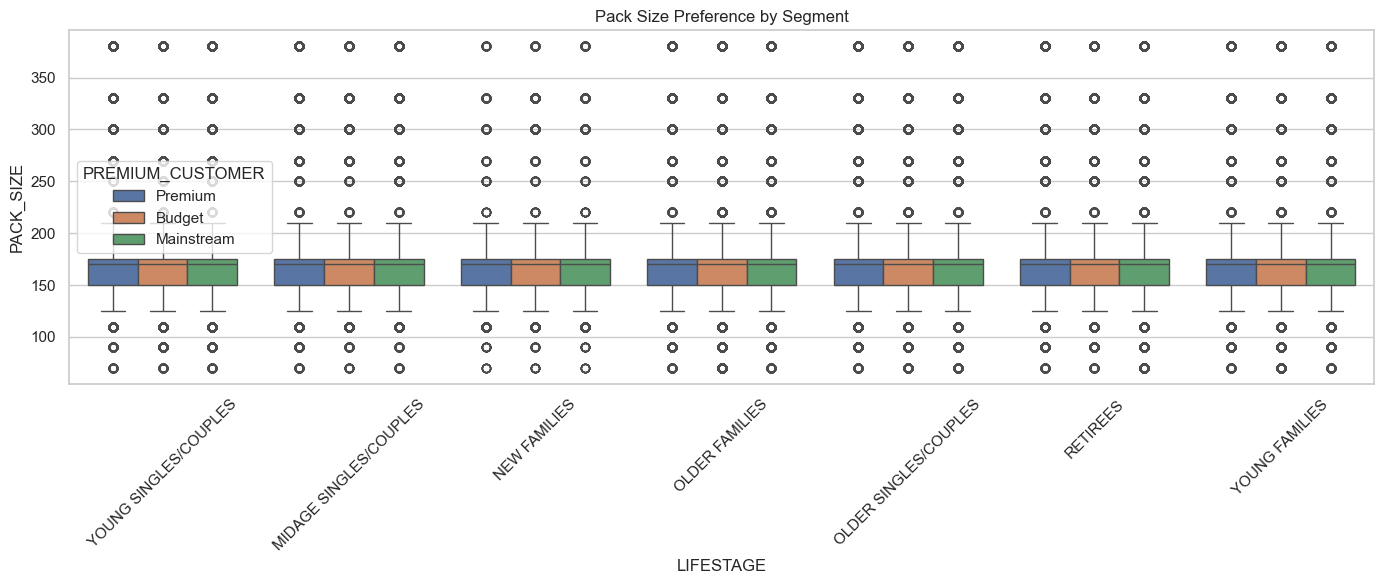

In [25]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_df, x='LIFESTAGE', y='PACK_SIZE', hue='PREMIUM_CUSTOMER')
plt.title('Pack Size Preference by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


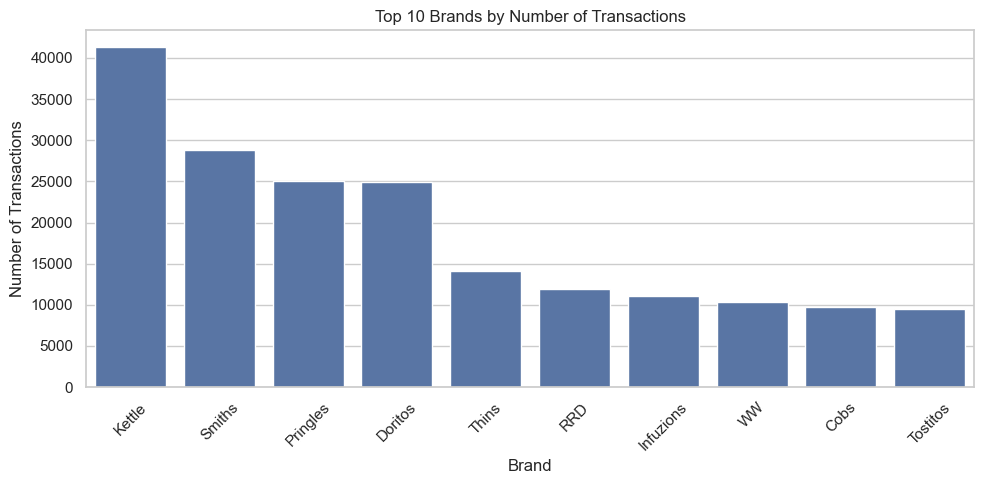

In [26]:
top_brands = merged_df['BRAND'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


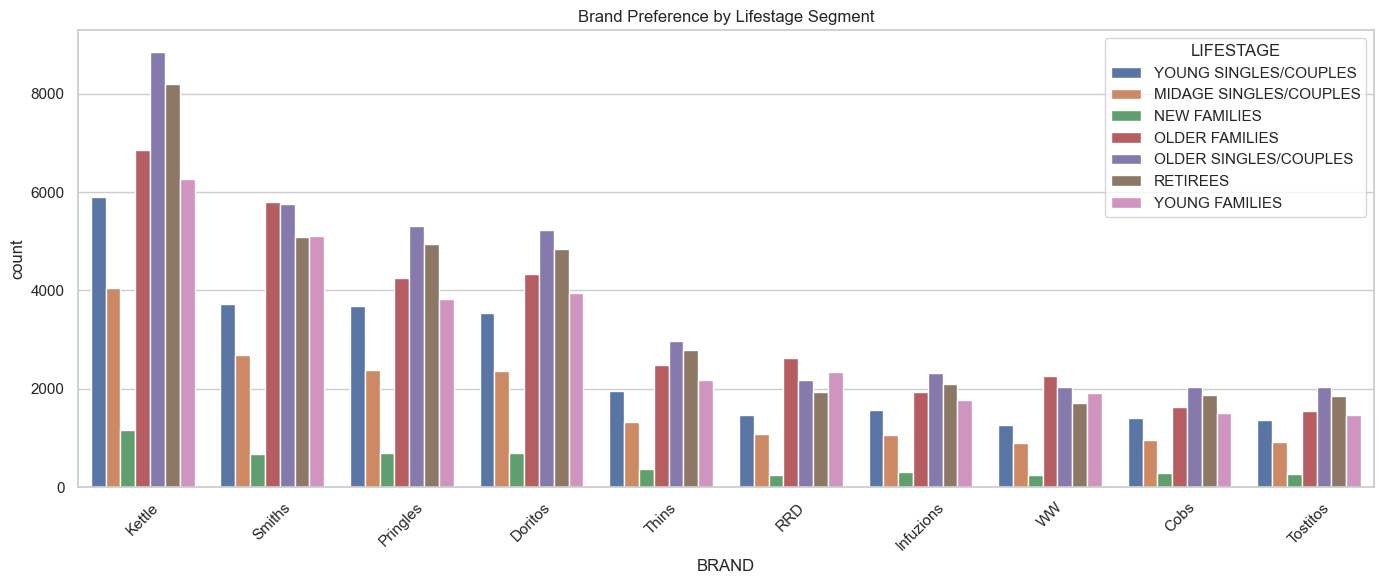

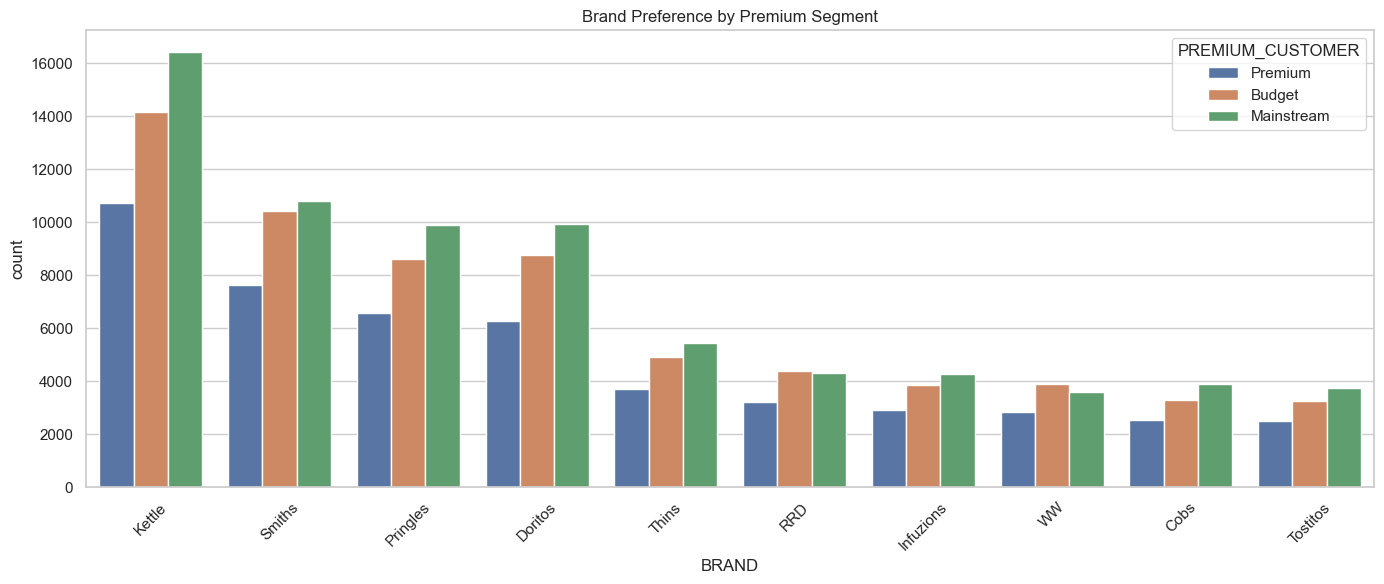

In [27]:
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='BRAND', hue='LIFESTAGE', order=top_brands.index)
plt.title('Brand Preference by Lifestage Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='BRAND', hue='PREMIUM_CUSTOMER', order=top_brands.index)
plt.title('Brand Preference by Premium Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


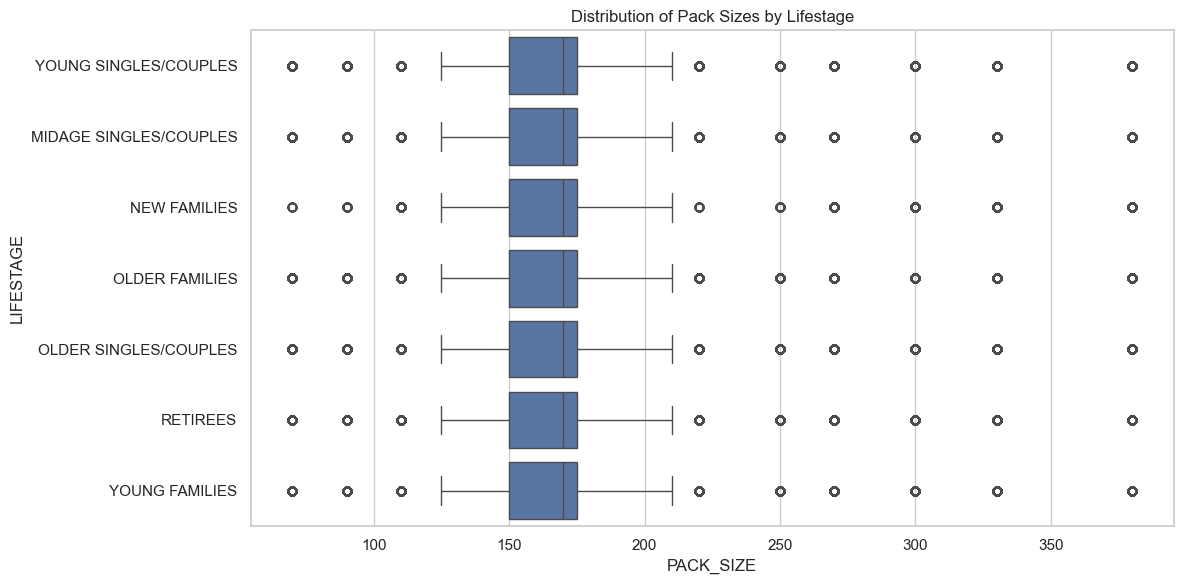

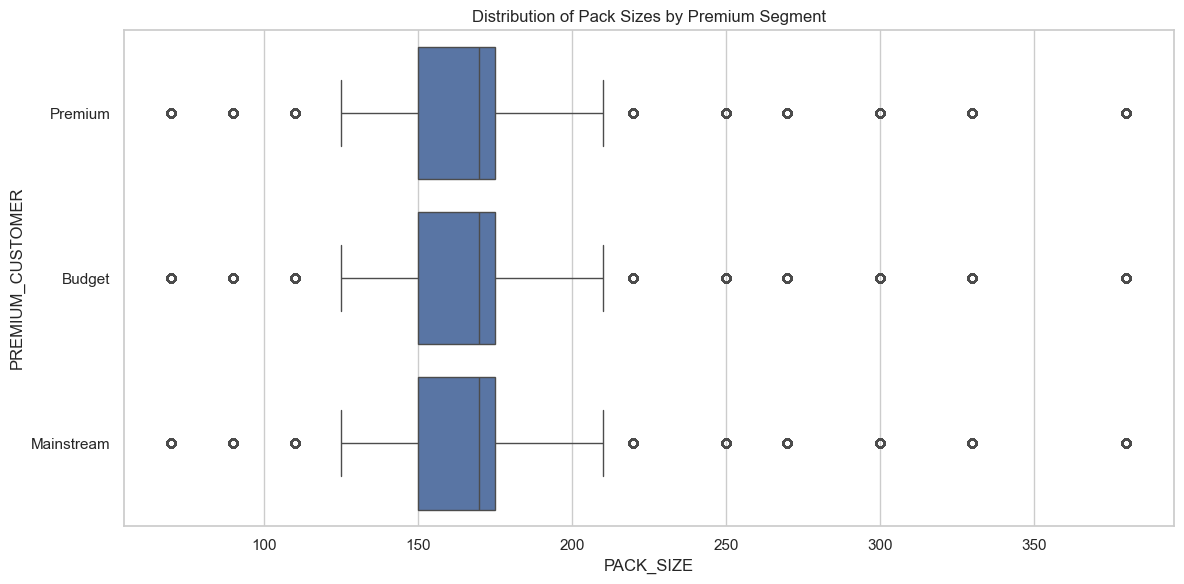

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='PACK_SIZE', y='LIFESTAGE')
plt.title('Distribution of Pack Sizes by Lifestage')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='PACK_SIZE', y='PREMIUM_CUSTOMER')
plt.title('Distribution of Pack Sizes by Premium Segment')
plt.tight_layout()
plt.show()
